In [1]:
%pushd ..

/home/lukak/Projects/lineage/lineage-growth


['~/Projects/lineage/lineage-growth/notebooks']

In [2]:
from lineage.LineageTree import LineageTree
from lineage.tHMM import tHMM
from lineage.states.StateDistributionGamma import StateDistribution
import numpy as np

In [136]:
bern_p0 = 0.9
gamma_a0 = 10
gamma_scale0 = 1

bern_p1 = 0.5
gamma_a1 = 20
gamma_scale1 = 10

bern_p2 = 0.2
gamma_a2 = 50
gamma_scale2 = 10

state_obj0 = StateDistribution(bern_p0, gamma_a0, gamma_scale0)
state_obj1 = StateDistribution(bern_p1, gamma_a1, gamma_scale1)
state_obj2 = StateDistribution(bern_p2, gamma_a2, gamma_scale2)

In [107]:
pi = np.array([.6, .4])
T = np.array([[.9, .1],[.2, .8]])
E = [state_obj0, state_obj1]

In [137]:
# 3 States
pi = np.array([.5, .3, .2])
T = np.array([[.8, .1, .1],
             [.1, .8, .1],
             [.1, .1, .8]])
E = [state_obj0, state_obj1, state_obj2]

In [174]:
lineages = []
for _ in range(10):
    lineages.append([LineageTree.init_from_parameters(pi, T, E, 2**6-1)])

In [32]:
from lineage.Analyze import run_Analyze_over
import matplotlib.pyplot as plt
from lineage.Analyze import Analyze

In [154]:

# add 10 curves to compare each lineage separately
ls = []
for lineage in lineages:
    ls.append(lineage[0])
AICs = []
for _ in range(10):
    AICs.append([])
for state in range(6):
    tHMM, _, LL = Analyze(ls, state+1)
    AIC, _ = tHMM.get_AIC(LL)
    for lineage in range(len(lineages)):
        AICs[lineage].append(AIC[lineage])


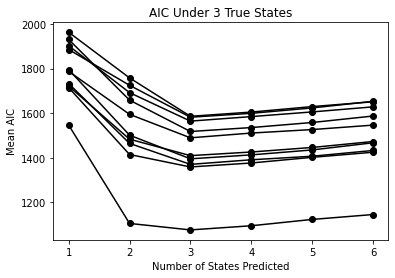

In [155]:
for curve in AICs:
    plt.errorbar(np.arange(1,7), curve, fmt = 'ko-')

plt.ylabel("Mean AIC")
plt.xlabel("Number of States Predicted")
plt.xticks(np.arange(1,7))
plt.title('AIC Under 3 True States')
#plt.savefig('/Users/lukakarginov/lineage-growth/notebooks/AIC 3 States.pdf')
plt.show()

In [179]:
AICs = [[],[],[],[],[],[],[],[],[],[]]
for states in range(1,5):
    output = run_Analyze_over(lineages, states)
    for lineageNo in range(len(lineages)):  
        AIC, _ = output[lineageNo][0].get_AIC(output[lineageNo][2])
        AICs[lineageNo].append(AIC[0])

/home/lukak/Projects/lineage/lineage-growth/lineage/UpwardRecursion.py:235: RuntimeWarning: invalid value encountered in true_divide
  return np.matmul(T, beta_array[node_child_n_idx, :] / MSD_array[node_child_n_idx, :])
/home/lukak/Projects/lineage/lineage-growth/lineage/UpwardRecursion.py:235: RuntimeWarning: invalid value encountered in true_divide
  return np.matmul(T, beta_array[node_child_n_idx, :] / MSD_array[node_child_n_idx, :])
/home/lukak/Projects/lineage/lineage-growth/lineage/BaumWelch.py:100: RuntimeWarning: invalid value encountered in true_divide
  T_estimate_prenorm = numer_estimate / denom_estimate[:, np.newaxis]
/home/lukak/Projects/lineage/lineage-growth/lineage/UpwardRecursion.py:235: RuntimeWarning: invalid value encountered in true_divide
  return np.matmul(T, beta_array[node_child_n_idx, :] / MSD_array[node_child_n_idx, :])
/home/lukak/Projects/lineage/lineage-growth/lineage/UpwardRecursion.py:235: RuntimeWarning: invalid value encountered in true_divide
  retur

Caught the following errors:                     
 
 [AssertionError(), AssertionError(), AssertionError(), AssertionError(), AssertionError(), AssertionError('[ 0.  0.  0.  0.  0.  0.  0. nan  0.  0.  0.  0.  0.  0.  0.] and nan and [0.00103011 0.3915445  0.3094064  0.29801899] and [       nan 0.00146026 0.00109162 0.00205765]'), AssertionError(), AssertionError('[ 0.  0.  0.  0.  0.  0.  0. nan  0.  0.  0.  0.  0.  0.  0.] and nan and [0.35409728 0.03739861 0.00491932 0.60358479] and [0.00141304        nan 0.00195625 0.00255282]'), AssertionError(), AssertionError(), AssertionError(), AssertionError(), AssertionError(), AssertionError()] 
 
 in fitting after multiple 14 runs.                     Fitting is breaking after trying 14 times.                     If you're facing a ZeroDivisionError or a RuntimeError then the most likely issue                     is the estimates of your parameters are returning nonsensible parameters.                     Consider changing your parameter e

AssertionError: 

ValueError: x and y must have same first dimension, but have shapes (4,) and (3,)

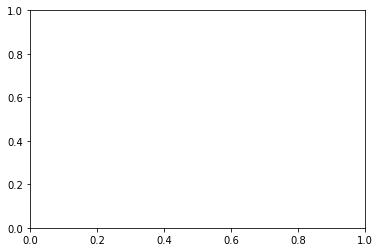

In [178]:
for curve in AICs:
    plt.plot(np.arange(1,5), curve, 'ko-')

In [25]:
AICs

[[375.63715570443355,
  493.7211514696688,
  359.84874355413064,
  377.34803689270814,
  401.3437353567882,
  365.6708383028509,
  305.55880019327594,
  343.1998214376241,
  363.32273471809,
  323.4472237723534],
 [253.18760522403784,
  331.31019473770976,
  248.8712485029151,
  259.1455575221813,
  290.1133479634908,
  244.32890799507203,
  192.29541143940125,
  233.37706937387856,
  269.7900983677842,
  220.77347724973234],
 [269.1580590539279,
  345.7886310487751,
  266.31040449150964,
  275.0194759094452,
  306.45704290811744,
  259.7818366032521,
  208.1445706620755,
  249.1090077924684,
  284.7365635355412,
  236.61909149570093],
 [291.5622375918391,
  379.27832784841814,
  285.1133075640146,
  293.5951437089658,
  327.5398867383629,
  280.2948882316085,
  229.05822536098646,
  273.35067651839006,
  310.10902221405695,
  259.34421239482003],
 [308.74057162931206,
  390.7430597439106,
  303.91108269764106,
  317.81963329485654,
  348.95599343555466,
  296.9828553812148,
  247.9002

In [180]:
np.ones(len(E))/len(E)

array([0.33333333, 0.33333333, 0.33333333])

In [337]:
x=(np.eye(4)+.2)
x[0][0]+=1
x[2][1]+=1

In [230]:
y = (x.T/np.sum(x, axis = 1)).T

In [338]:
x/np.sum(x, axis = 0)[np.newaxis,:]

array([[0.78571429, 0.07142857, 0.11111111, 0.11111111],
       [0.07142857, 0.42857143, 0.11111111, 0.11111111],
       [0.07142857, 0.42857143, 0.66666667, 0.11111111],
       [0.07142857, 0.07142857, 0.11111111, 0.66666667]])

In [341]:
np.sum(x, axis = 1)[:,np.newaxis]

array([[2.8],
       [1.8],
       [2.8],
       [1.8]])

In [280]:
x/np.sum(x, axis=0)

In [276]:
np.sum(x, axis=1)

array([2, 3])

In [330]:
np.divide(x.T,np.sum(x,axis=1)).T

array([[0.78571429, 0.07142857, 0.07142857, 0.07142857],
       [0.11111111, 0.66666667, 0.11111111, 0.11111111],
       [0.07142857, 0.07142857, 0.78571429, 0.07142857],
       [0.11111111, 0.11111111, 0.11111111, 0.66666667]])

In [316]:
x = np.array([[0,0,0]])

In [318]:
x[np.newaxis,:]

array([[[0, 0, 0]]])

ValueError: x and y must have same first dimension, but have shapes (3,) and (10, 3)

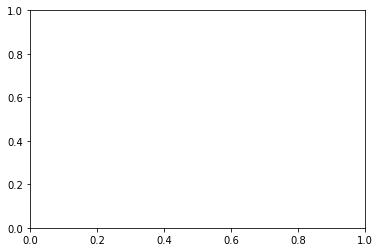

In [344]:
plt.plot(np.arange(3), AICs)

In [348]:
x = np.empty((2,2))
x

array([[  7.325, 105.176],
       [ 23.075, 115.176]])

In [349]:
x[1,1]

115.176

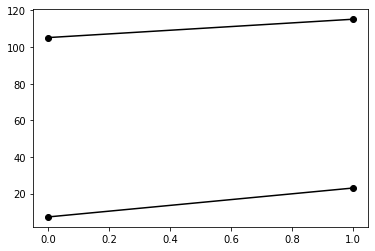

In [351]:
plt.plot(np.arange(0,2), x,'ko-')

In [363]:
num_states_shown = 5
pi = np.ones(len(E))/len(E)
T = (np.eye(len(E)) + .2)
T = T/np.sum(T, axis=1)[:,np.newaxis]

lineages = []
for _ in range(10):
    lineages.append([LineageTree.init_from_parameters(pi, T, E, 2**7-1)])

AICs = np.empty((len(lineages), num_states_shown))
for states in range(0,num_states_shown):
    output = run_Analyze_over(lineages, states+1)
    for lineageNo in range(len(lineages)):  
        AIC, _ = output[lineageNo][0].get_AIC(output[lineageNo][2])
        AICs[lineageNo][ states]= AIC[0]


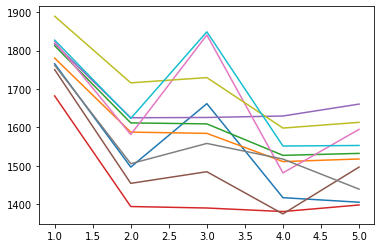

In [364]:
plt.plot(np.arange(1,6),AICs.T)

In [365]:
E

In [368]:
E[1].params

[0.5, 20, 10]

In [370]:
E[0].params

[0.9, 10, 1]